# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

# In regards to the question "What is the weather like as we approach the equator?" there are multiple answers thanks to our analyses.For Temperature, we can see that the northern hemisphere had a stronger correlation between temperature and latitude compared to the sourthern hemisphere after analyzing the rvalue between temp and latitude of both hemispheres. But both hemispheres did present a correlation. Therefore, the closer you get to the equator the warmer you will be , especially when only looking at the northern hemisphere. Furthermore, There was also a higher correlation between humidity and latitiude for the northern hemisphere compared to the southern hemisphere. Thus, as you get closer to the equator (in the northern hemisphere), the more humidity you will experience, but the correlation was not as strong here compared to temperature. On the other hand, we also saw that latitude is correlated to wind speed, especially in the southern hemisphere. So when you get closer to the equator (from the southern hemisphere), the lower the wind speed.The same relationship was evident for cloudiness since cloudiness increased the closer we got to the equator, when looking from the southern hemisphere. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key



'e52551c4f72edabae5d605fceb3d1730'

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather['coord']['lat']
        city_lng = weather['coord']['lon']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_clouds = weather['clouds']['all']
        city_wind = weather ['wind']['speed']
        city_country = weather['sys']['country']
        city_date = weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | mareeba
Processing Record 4 of Set 1 | tautira
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | grand centre
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | pangai
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | susehri
Processing Record 12 of Set 1 | wonthaggi
Processing Record 13 of Set 1 | mattru
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | wukari
Processing Record 16 of Set 1 | manacapuru
Processing Record 17 of Set 1 | kurchum
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | waddan
Processing Record 23 of Set 1 | sa

Processing Record 37 of Set 4 | pacific grove
Processing Record 38 of Set 4 | bluff
Processing Record 39 of Set 4 | sanandaj
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | ola
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | malanje
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | beira
Processing Record 47 of Set 4 | itaituba
Processing Record 48 of Set 4 | misratah
Processing Record 49 of Set 4 | karaul
City not found. Skipping...
Processing Record 0 of Set 5 | herat
Processing Record 1 of Set 5 | baiyin
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | wuhan
Processing Record 4 of Set 5 | krasnovishersk
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | kailua
Processing Record 7 of Set 5 | sulphur springs
Processing Record 8 of Set 5 | mount gambier
Processing Record 9 of Set 5 | hirara
Processing Record 10 of Set 5 | haines 

Processing Record 28 of Set 8 | honningsvag
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | kilcullen
Processing Record 31 of Set 8 | college
Processing Record 32 of Set 8 | lolua
City not found. Skipping...
Processing Record 33 of Set 8 | opuwo
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | buraydah
Processing Record 36 of Set 8 | gravdal
Processing Record 37 of Set 8 | talcahuano
Processing Record 38 of Set 8 | cayenne
Processing Record 39 of Set 8 | sao joao da barra
Processing Record 40 of Set 8 | kiama
Processing Record 41 of Set 8 | guarapari
Processing Record 42 of Set 8 | minden
Processing Record 43 of Set 8 | bulawayo
Processing Record 44 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | rosetta
Processing Record 47 of Set 8 | pangnirtung
Processing Record 48 of Set 8 | ginir
Processing Record 49 of Set 8 | wewak
Processing Record 0 of Set 9 | rognan
Processi

Processing Record 17 of Set 12 | la orilla
Processing Record 18 of Set 12 | khasan
Processing Record 19 of Set 12 | luau
Processing Record 20 of Set 12 | vila franca do campo
Processing Record 21 of Set 12 | meulaboh
Processing Record 22 of Set 12 | chekhov
Processing Record 23 of Set 12 | ghanzi
Processing Record 24 of Set 12 | ayan
Processing Record 25 of Set 12 | yalova
Processing Record 26 of Set 12 | tsalka
Processing Record 27 of Set 12 | maryville
Processing Record 28 of Set 12 | vangaindrano
Processing Record 29 of Set 12 | mendi
Processing Record 30 of Set 12 | hit
Processing Record 31 of Set 12 | toora-khem
Processing Record 32 of Set 12 | igrim
Processing Record 33 of Set 12 | kysyl-syr
Processing Record 34 of Set 12 | kerman
Processing Record 35 of Set 12 | tahe
Processing Record 36 of Set 12 | asyut
Processing Record 37 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 38 of Set 12 | guaraniacu
Processing Record 39 of Set 12 | tinskoy
Processing Record 40

In [7]:
# Convert the cities weather data into a Pandas DataFrame
                    
city_data_df= pd.DataFrame(city_data)  
city_data_df

# Show Record Count

city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,59.88,83,20,2.51,ZA,1669867295
1,castro,-24.7911,-50.0119,58.96,98,60,4.45,BR,1669867295
2,mareeba,-17.0000,145.4333,80.44,80,100,0.31,AU,1669867296
3,tautira,-17.7333,-149.1500,78.24,83,31,14.38,PF,1669867291
4,dikson,73.5069,80.5464,22.53,94,100,14.63,RU,1669867296


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,59.88,83,20,2.51,ZA,1669867295
1,castro,-24.7911,-50.0119,58.96,98,60,4.45,BR,1669867295
2,mareeba,-17.0000,145.4333,80.44,80,100,0.31,AU,1669867296
3,tautira,-17.7333,-149.1500,78.24,83,31,14.38,PF,1669867291
4,dikson,73.5069,80.5464,22.53,94,100,14.63,RU,1669867296


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

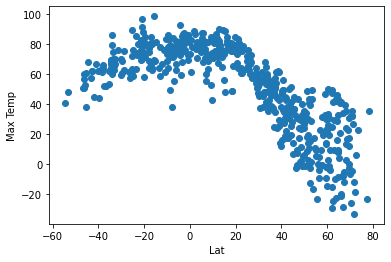

In [15]:
# Build scatter plot for latitude vs. temperature


plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

plt.xlabel("Lat")
plt.ylabel("Max Temp")



# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig1.png")



# Show plot
plt.show()

#### Latitude Vs. Humidity

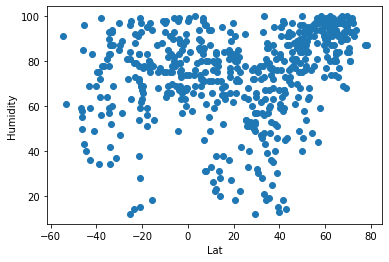

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

plt.xlabel("Lat")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

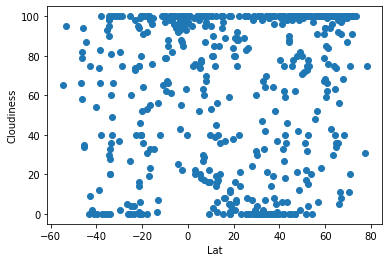

<Figure size 432x288 with 0 Axes>

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

plt.xlabel("Lat")
plt.ylabel("Cloudiness")

plt.show()
# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

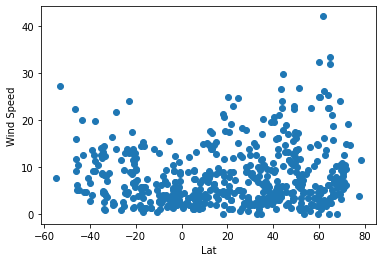

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

plt.xlabel("Lat")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("/users/juanmarin/desktop/Data_Bootcamp/python-api-challenge1/WeatherPy/Starter_Code_5/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


r-value is: -0.7312714306183653


<function matplotlib.pyplot.show(close=None, block=None)>

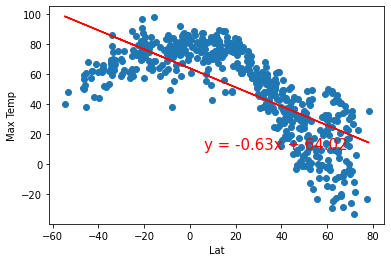

In [19]:
# Define a function to create Linear Regression plots
    
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"r-value is: {rvalue}")
plt.show
    

    
    

r-value is: 0.2087904846635477


<function matplotlib.pyplot.show(close=None, block=None)>

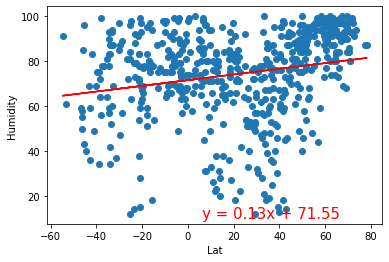

In [20]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.12646377895679242


<function matplotlib.pyplot.show(close=None, block=None)>

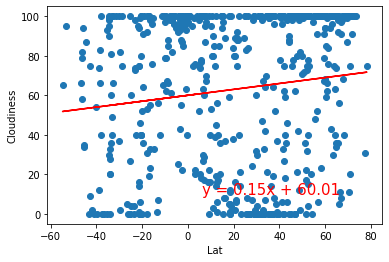

In [21]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.09536513023795684


<function matplotlib.pyplot.show(close=None, block=None)>

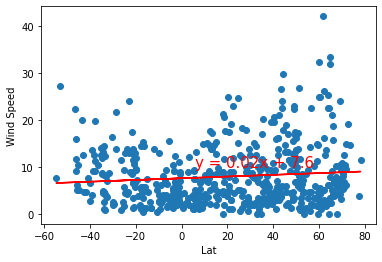

In [22]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"r-value is: {rvalue}")
plt.show

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df= city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,dikson,73.5069,80.5464,22.53,94,100,14.63,RU,1669867296
5,vardo,70.3705,31.1107,31.98,86,100,8.05,NO,1669867297
9,susehri,40.1644,38.0867,47.86,82,78,2.48,TR,1669867299
11,mattru,7.6244,-11.8332,73.20,96,87,0.98,SL,1669867300
13,wukari,7.8500,9.7833,69.30,31,97,5.28,NG,1669867301


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df= city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,59.88,83,20,2.51,ZA,1669867295
1,castro,-24.7911,-50.0119,58.96,98,60,4.45,BR,1669867295
2,mareeba,-17.0000,145.4333,80.44,80,100,0.31,AU,1669867296
3,tautira,-17.7333,-149.1500,78.24,83,31,14.38,PF,1669867291
6,hermanus,-34.4187,19.2345,63.99,83,99,4.54,ZA,1669867297


###  Temperature vs. Latitude Linear Regression Plot

r-value is: -0.842906739036553


<function matplotlib.pyplot.show(close=None, block=None)>

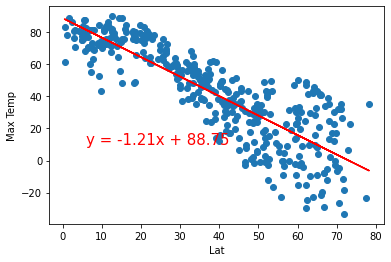

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.5819140579878109


<function matplotlib.pyplot.show(close=None, block=None)>

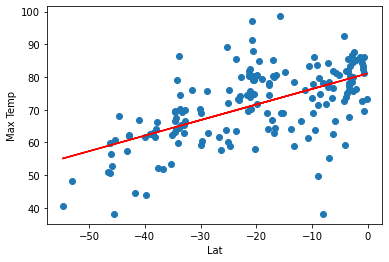

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# In regards to temperature and latitiude, we can see that the northern hemisphere had a stronger correlation between temperature and latitude compared to the sourthern hemisphere after analyzing the rvalue of both graphs. The closer the r-value is to 1 the stronger the correlation.

### Humidity vs. Latitude Linear Regression Plot

r-value is: 0.3708403107177104


<function matplotlib.pyplot.show(close=None, block=None)>

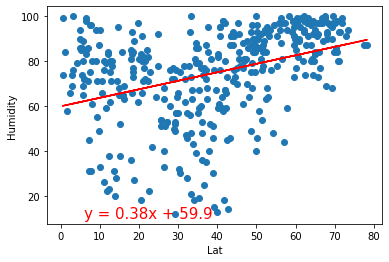

In [27]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.20635666614413894


<function matplotlib.pyplot.show(close=None, block=None)>

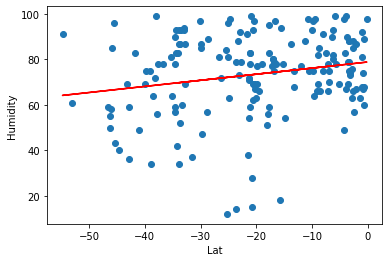

In [28]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Humidity')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# We can see that there is a slightly higher correlation for latitude and humidity for the northern hemisphere compared to the southern hemisphere since the r-value for northern was .3 comapred to southern which was .2.






### Cloudiness vs. Latitude Linear Regression Plot

r-value is: 0.23691666186604415


<function matplotlib.pyplot.show(close=None, block=None)>

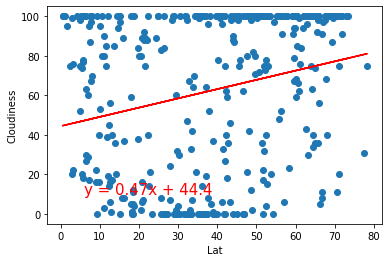

In [32]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"r-value is: {rvalue}")
plt.show

r-value is: 0.360976723850784


<function matplotlib.pyplot.show(close=None, block=None)>

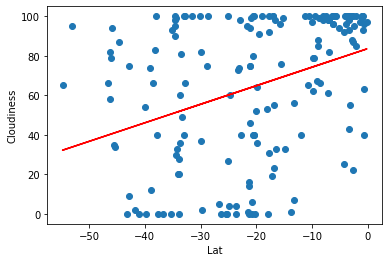

In [33]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# There is a weak correlation between latitude and cloudiness in both northern or southern hemishperes since the r-values were .2 and .3 for both. But Noerhtern hemisphere had a slightly stronger correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value is: 0.16895781653165182


<function matplotlib.pyplot.show(close=None, block=None)>

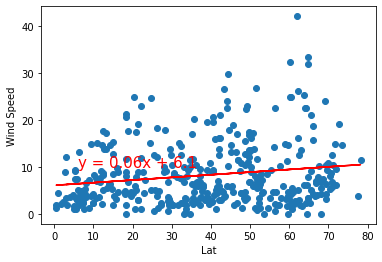

In [34]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"r-value is: {rvalue}")
plt.show

r-value is: -0.3715205540743018


<function matplotlib.pyplot.show(close=None, block=None)>

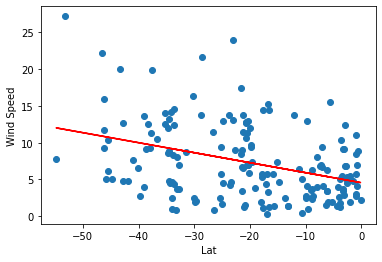

In [35]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
print(f"r-value is: {rvalue}")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

# The southern hemisphere has a stronger correlation between wind speed and latitude since it had an r-value of .3 compared to the rvalue of .1 we saw for northern hemisphere. 